In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load takeout data as a dataframe
activity_data = pd.read_json("../takeout-data/My Activity/Search/MyActivity.json")
activity_data.head()

,header,title,titleUrl,time,products,activityControls,locationInfos,subtitles,details
0,Search,Visited Help Change The Homebuilding Industry ...,https://www.google.com/url?q=https://www.higha...,2024-11-05T04:01:07.175Z,[Search],[Web & App Activity],NaN,NaN,NaN
1,Search,Searched for higharc careers,https://www.google.com/search?q=higharc+careers,2024-11-05T04:00:57.090Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN
2,Search,Visited Takeout only gives 1 year of browsing ...,https://www.google.com/url?q=https://www.reddi...,2024-11-05T03:55:13.711Z,[Search],[Web & App Activity],NaN,NaN,NaN
3,Search,Searched for see every google search made goog...,https://www.google.com/search?q=see+every+goog...,2024-11-05T03:55:00.769Z,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN
4,Search,Visited Digital Wellbeing Statistics from Huma...,https://www.google.com/url?q=https://digitalwe...,2024-11-05T03:39:11.751Z,[Search],[Web & App Activity],NaN,NaN,NaN


In [3]:
# convert the time column to datetime
activity_data['time'] = pd.to_datetime(activity_data['time'], format='ISO8601')

# update timestamps to be dd-mm-yyyy only
activity_data['time'] = activity_data['time'].dt.strftime('%d-%m-%Y')
activity_data.head()

,header,title,titleUrl,time,products,activityControls,locationInfos,subtitles,details
0,Search,Visited Help Change The Homebuilding Industry ...,https://www.google.com/url?q=https://www.higha...,05-11-2024,[Search],[Web & App Activity],NaN,NaN,NaN
1,Search,Searched for higharc careers,https://www.google.com/search?q=higharc+careers,05-11-2024,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN
2,Search,Visited Takeout only gives 1 year of browsing ...,https://www.google.com/url?q=https://www.reddi...,05-11-2024,[Search],[Web & App Activity],NaN,NaN,NaN
3,Search,Searched for see every google search made goog...,https://www.google.com/search?q=see+every+goog...,05-11-2024,[Search],[Web & App Activity],"[{'name': 'At this general area', 'url': 'http...",NaN,NaN
4,Search,Visited Digital Wellbeing Statistics from Huma...,https://www.google.com/url?q=https://digitalwe...,05-11-2024,[Search],[Web & App Activity],NaN,NaN,NaN


In [4]:
time_series_data = activity_data.groupby('time').size().reset_index(name="searches")
time_series_data.set_index('time', inplace=True)

In [5]:
# convert the index to datetime
time_series_data.index = pd.to_datetime(time_series_data.index, format='%d-%m-%Y')

In [9]:
weekly_data = time_series_data.resample('W').sum()

In [6]:
import matplotlib.font_manager as fm

In [7]:
path_to_public_sans = fm.findfont('Public Sans')
public_sans = fm.FontProperties(fname=path_to_public_sans)

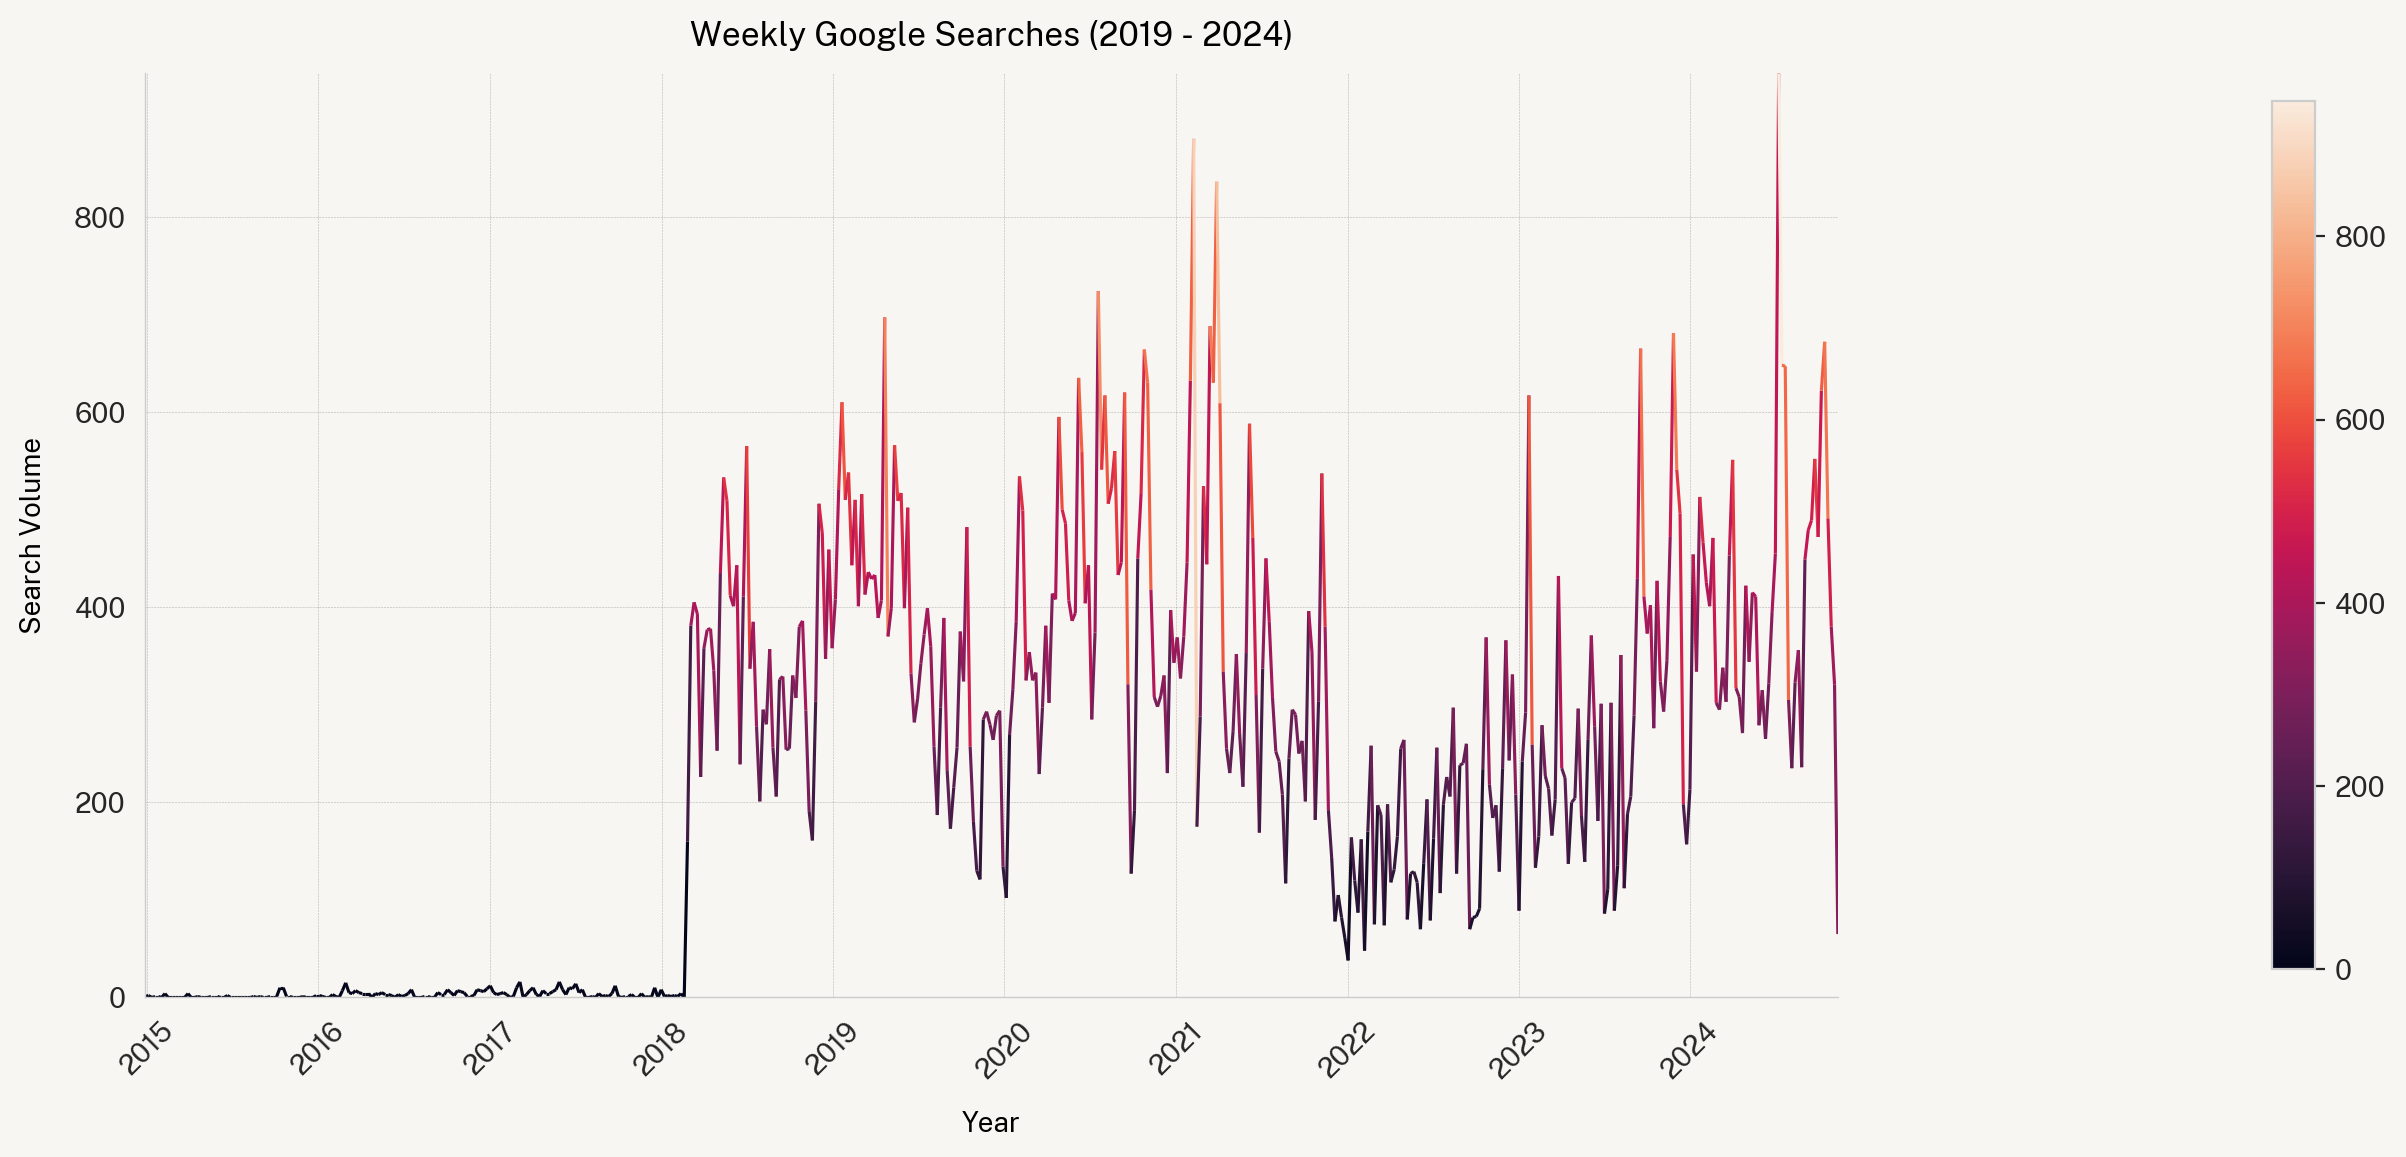

In [10]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib.dates as mdates

# Set a minimalist, Tufte-like style
sns.set_style("whitegrid")
plt.rcParams['font.family'] = public_sans.get_name()  # Register the font by its internal name

x = weekly_data.index
y = weekly_data['searches']
points = np.array([mdates.date2num(x), y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, ax = plt.subplots(figsize=(14, 6), dpi=200)


# Remove spines and lighten grid lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.xaxis.set_tick_params(width=0.5)
ax.yaxis.set_tick_params(width=0.5)
ax.grid(True, color='grey', linestyle='--', linewidth=0.2, alpha=0.55)

# Use muted colors for the color map
norm = plt.Normalize(y.min(), y.max())
lc = LineCollection(segments, cmap='rocket', norm=norm)  # Choose grayscale for retro look
lc.set_array(y)
lc.set_linewidth(1.125)  # Slightly thicker to emphasize data

# Add collection and color bar
line = ax.add_collection(lc)
fig.colorbar(line, ax=ax, orientation='vertical', fraction=0.02, pad=0.2)

# Set the limits and ticks
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))



# Register JetBrains Mono font (if not already installed globally)

plt.xticks(rotation=45)

# Set background color to a very light beige, like old engineering paper
fig.patch.set_facecolor('#f7f6f2')
ax.set_facecolor('#f7f6f2')

# Final touches for 80s engineering manual feel
ax.set_title('Weekly Google Searches (2019 - 2024)', fontsize=12, weight='regular', color='black', pad=10)
ax.set_xlabel('Year', fontsize=10, weight='regular', color='black', labelpad=10)
ax.set_ylabel('Search Volume', fontsize=10, weight='regular', color='black', labelpad=10)
plt.show()
